# Import pandas and other packages to be used

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import and preview a dataset

In [47]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197625 entries, 0 to 197624
Data columns (total 11 columns):
C/A                                                                     197625 non-null object
UNIT                                                                    197625 non-null object
SCP                                                                     197625 non-null object
STATION                                                                 197625 non-null object
LINENAME                                                                197625 non-null object
DIVISION                                                                197625 non-null object
DATE                                                                    197625 non-null object
TIME                                                                    197625 non-null object
DESC                                                                    197625 non-null object
ENTRIES                           


# Data Munging/ Manipulation
This MTA turnstile dataset is a great place for us to get our hands dirty wrnagling and cleaning some data!  

Let's start by example by filtering the data down to all stations for the N line. To do this, we'll need to extract all "N"s from the LINENAME column, or similarly, create a column indicating whether or not the stop is an N line stop.

### Defining Functions

At this point, we will need to define some functions to perform data manipulation. In python, we define a function using the `def` keyword. Afterwords, we give the function a name, followed by parentheses. Any required (or optional parameters) are specified within the parentheses, just as you would normally call a function. You then specify the functions behavior using a colon and an indendation, much the same way you would a for loop or conditional block. Finally, if you want your function to return something (as with the str.pop() method) as opposed to a function that simply does something in the background but returns nothing (such as list.append()), you must use the `return` keyword. Note that as soon as a function hits a point in execution where something is returned, the function would terminate and no further commands would be executed. In other words the `return` command both returns a value and forces termination of the function.

In [49]:
def contains_n(text):
    if 'N' in text:
        return True
    else:
        return False

#or the shorter, more pythonic:
def contains_n(text):
    bool_val = 'N' in text
    return bool_val

In [50]:
df['On_N_Line'] = df.LINENAME.map(contains_n)
df.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,On_N_Line
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,True
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,True


In [51]:
df.tail(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,On_N_Line
197623,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,17:00:00,REGULAR,5554,348,False
197624,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,21:00:00,REGULAR,5554,348,False


In [52]:
df.On_N_Line.value_counts(normalize=True)

False    0.870441
True     0.129559
Name: On_N_Line, dtype: float64

# Explanation
Above we used the map method for pandas series. This allows us to pass a function that will be applied to each and every data entry within the series. As shorthand, we could also pass a lambda function to determine whether or not each row was on the N line or not.  
`df['On_N_Line'] = df.LINENAME.map(lambda x: 'N' in x)`
This is shorter and equivalent to the above functions defined above. Lambda functions are often more covenient shorthand, but have less functionality then defining functions explicitly.

# Practice
Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [53]:
df.groupby('STATION')['LINENAME'].nunique()

STATION
1 AV               1
103 ST             3
103 ST-CORONA      1
104 ST             2
110 ST             1
111 ST             3
116 ST             3
116 ST-COLUMBIA    1
121 ST             1
125 ST             4
135 ST             2
137 ST CITY COL    1
138/GRAND CONC     1
14 ST              3
14 ST-UNION SQ     2
145 ST             2
149/GRAND CONC     1
14TH STREET        1
15 ST-PROSPECT     1
155 ST             2
157 ST             1
161/YANKEE STAD    2
167 ST             2
168 ST             2
169 ST             1
170 ST             2
174 ST             1
175 ST             1
176 ST             1
18 AV              3
                  ..
SUTPHIN-ARCHER     1
SUTTER AV          1
SUTTER AV-RUTLD    1
THIRTY ST          1
THIRTY THIRD ST    1
TIMES SQ-42 ST     3
TOMPKINSVILLE      1
TREMONT AV         1
TWENTY THIRD ST    1
UNION ST           1
UTICA AV           1
V.CORTLANDT PK     1
VAN SICLEN AV      2
VAN SICLEN AVE     1
VERNON-JACKSON     1
W 4 ST-WASH SQ     1
W 8 S

# Cleaning Column Names
Sometimes, you have messy column names. Observe:

In [54]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'On_N_Line'],
      dtype='object')

You might notice that foolishly, the EXITS column has a lot of annoying whitespace following it.
We can quickly use a list comprehension to clean up all of the column names.

### Write a function to clean a column name.

In [55]:
def clean(col_name):
    cleaned = col_name.strip()
    return cleaned

In [56]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [57]:
#Checking the output, we can see the results.
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'On_N_Line'],
      dtype='object')

# Reformatting Column Types
Another common data munging technique can be reformating column types. We first previewed column types above using the `df.info()` method, which we'll repeat here.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197625 entries, 0 to 197624
Data columns (total 12 columns):
C/A          197625 non-null object
UNIT         197625 non-null object
SCP          197625 non-null object
STATION      197625 non-null object
LINENAME     197625 non-null object
DIVISION     197625 non-null object
DATE         197625 non-null object
TIME         197625 non-null object
DESC         197625 non-null object
ENTRIES      197625 non-null int64
EXITS        197625 non-null int64
On_N_Line    197625 non-null bool
dtypes: bool(1), int64(2), object(9)
memory usage: 16.8+ MB


A common transformation needed is converting numbers stored as text to *float* or *integer* representations. In this cas ENTRIES and EXITS are appropriately *int64*, but to practice, we'll demonstrate changing that to a float and then back to an int.

In [59]:
print(df.ENTRIES.dtype) #We can also check an individual column type rather then all 
df.ENTRIES = df.ENTRIES.astype(float) #Changing the column to float
print(df.ENTRIES.dtype) #Checking our changes

int64
float64


In [60]:
#Converting Back
print(df.ENTRIES.dtype) 
df.ENTRIES = df.ENTRIES.astype(int)
print(df.ENTRIES.dtype)

float64
int64


Attempting to convert a string column to int or float will produce errors if there are actually non numeric characters

In [61]:
df.LINENAME = df.LINENAME.astype(int)

ValueError: invalid literal for int() with base 10: 'NQR456W'

# Converting Dates
A slightly more complicated data type transformation is creating *date* or *datetime* objects. These are built in datatypes that have useful information such as being able to quickly calculate the time between two days, or extracting the day of the week from a given date. However, if we look at our current date column, we will notice it is simply a *non-null object* (probably simply text).

In [62]:
df.DATE.dtype

dtype('O')

# pd.to_datetime()
This is the handiest of methods when converting strings to datetime objects.

In [63]:
#Often you can simply pass the series into this method.
pd.to_datetime(df.DATE).head() #It is good practice to preview the results first
#This prevents overwriting data if some error was produced. However everything looks good!

0   2018-08-25
1   2018-08-25
2   2018-08-25
3   2018-08-25
4   2018-08-25
Name: DATE, dtype: datetime64[ns]

Sometimes the above won't work and you'll have to explicitly pass how the date is formatted.  
To do that, you have to use some datetime codes. Here's a preview of some of the most common ones:  
<img src="strftime_codes.png" width=600>

To explicitly pass formatting parameters, preview your dates and write the appropriate codes.

In [64]:
df.DATE.iloc[0] #Another method for slicing series/dataframes

'08/25/2018'

In [65]:
#Notice we include delimiters (in this case /) between the codes.
pd.to_datetime(df.DATE, format='%m/%d/%Y').head()

0   2018-08-25
1   2018-08-25
2   2018-08-25
3   2018-08-25
4   2018-08-25
Name: DATE, dtype: datetime64[ns]

In [66]:
#Actually apply and save our changes
df.DATE = pd.to_datetime(df.DATE)
print(df.DATE.dtype)
#Preview updated dataframe
df.head(2)

datetime64[ns]


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,On_N_Line
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,True
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,True


# Datetime Methods
Now that we have converted the DATE field to a datetime object we can use some useful built in methods.

In [67]:
#dt stores all the built in datetime methods (only works for datetime columns)
df.DATE.dt.day_name().head()

0    Saturday
1    Saturday
2    Saturday
3    Saturday
4    Saturday
Name: DATE, dtype: object

# Groupby Methods
Let's look at one more extremely important method. Groupby allows you to aggregate the data based on a field. You then apply an aggregation function such as *mean*, *median*, *count*, *min*, *max*, or even a custom function which you can define yourself!

In [68]:
df.groupby('STATION').sum().head()

,ENTRIES,EXITS,On_N_Line
STATION,,,
1 AV,127637422994,68336694378,0.0
103 ST,6809043268,26408857862,0.0
103 ST-CORONA,2936772648,3007136644,0.0
104 ST,201698739525,146808927663,0.0
110 ST,1485948761,1430806219,0.0


Notice that our groupby column becomes the index of the resulting view. To change this, you can also use the `.reset_index()` method.

In [69]:
df.groupby('STATION').sum().reset_index().head()

,STATION,ENTRIES,EXITS,On_N_Line
0,1 AV,127637422994,68336694378,0.0
1,103 ST,6809043268,26408857862,0.0
2,103 ST-CORONA,2936772648,3007136644,0.0
3,104 ST,201698739525,146808927663,0.0
4,110 ST,1485948761,1430806219,0.0


Finally, we could graph these as before.

In [70]:
df.columns = [col.strip() for col in df.columns]

In [ ]:
to_graph = df.groupby('STATION').sum().sort_values(by='ENTRIES')[['ENTRIES', 'EXITS']]
#Recall that default behavior for .sort_values() is ascending.
#Hence, we look at the tail rather then head for top values
#Alternatively, we could use .sort_values(ascending=False) followed by the .head() method
to_graph.tail(10).plot(kind='barh');
plt.title('Top 10 Stations Based on Number of Entries.');
plt.xlabel('Number of Entries/Exits');

# Practice
Here we begin to do some exploratory analysis to answer some questions.

# 1. Compare subway traffic by day of the week. Display this as a graph.

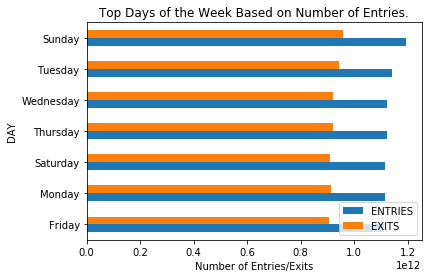

In [74]:
df['DAY'] = df.DATE.dt.day_name()

to_graph = df.groupby('DAY').sum().sort_values(by='ENTRIES')[['ENTRIES', 'EXITS']]
#Recall that default behavior for .sort_values() is ascending.
#Hence, we look at the tail rather then head for top values
#Alternatively, we could use .sort_values(ascending=False) followed by the .head() method
to_graph.tail(7).plot(kind='barh');
plt.title('Top Days of the Week Based on Number of Entries.');
plt.xlabel('Number of Entries/Exits');

# 2. Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

In [73]:
df.ENTRIES.value_counts(bins='DAY')

AxisError: axis -1 is out of bounds for array of dimension 0

In [75]:
df['DAY'] = df.DATE.dt.day_name()
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,On_N_Line,DAY
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,True,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,True,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,True,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,True,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,True,Saturday


In [77]:
df.groupby('DAY').sum().head(7)

,ENTRIES,EXITS,On_N_Line
DAY,,,
Friday,1110224700078,906799065337,3641.0
Monday,1114237052454,911938153513,3740.0
Saturday,1115661545514,909142081474,3609.0
Sunday,1192306179082,959223750461,3606.0
Thursday,1122723988662,920691927110,3702.0
Tuesday,1143313287046,942230721477,3667.0
Wednesday,1123655222441,920630864687,3639.0
